In [7]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt
from tqdm import tqdm
import math
import scipy.fftpack

# Izračun dct in kvantizacije primera

In [8]:
I = cv2.imread('images/lena.png')
I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

izsek = I_gray[120:128, 230:238]
print(izsek-128)
dct_izsek = np.array(scipy.fftpack.dctn(izsek-128, norm = 'ortho'))
np.set_printoptions(suppress=True)
print(np.round(dct_izsek, decimals=1))

quantize_table = np.array([
[16, 11, 10, 16,  24,  40,  51, 61],
[12, 12, 14, 19,  26,  58,  60, 55],
[14, 13, 16, 24,  40,  57,  69, 56],
[14, 17, 22, 29,  51,  87,  80, 12],
[18, 22, 37, 56,  68, 109, 103, 77],
[24, 35, 55, 64,  81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 10],
[72, 92, 95, 98, 112, 100, 103, 99],
])

quantize_izsek = np.round(np.divide(dct_izsek, quantize_table))

print(quantize_izsek)




[[54 33 24 36 37 43 60 63]
 [32 29 41 48 51 49 53 61]
 [45 48 51 52 59 54 41 47]
 [62 58 55 48 54 56 41 36]
 [57 67 61 50 48 55 52 39]
 [57 62 61 57 49 47 49 42]
 [56 43 54 57 52 46 44 46]
 [47 58 51 50 52 54 53 56]]
[[399.1   3.5  -0.7   4.2   0.9   0.3   1.8   0. ]
 [-20.6 -27.3   9.3   6.1   9.8   2.3   1.1   1. ]
 [-15.1 -35.   15.4  -4.2  14.7   5.6  -3.1  -0.5]
 [ -2.7   3.8  15.3  -0.6  -0.9  12.   -5.2   0.3]
 [  3.4   4.7  16.6  10.   -8.9  -1.9  -4.   -2.8]
 [ -4.8  10.9   3.4   9.1  10.1   4.1   4.1   1.1]
 [  5.    5.7   3.9   0.3  -3.3  -4.4  -4.6  -2.5]
 [  0.2  -0.4  -0.    0.3  -0.2  -0.   -0.   -0.3]]
[[25.  0. -0.  0.  0.  0.  0.  0.]
 [-2. -2.  1.  0.  0.  0.  0.  0.]
 [-1. -3.  1. -0.  0.  0. -0. -0.]
 [-0.  0.  1. -0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0. -0. -0. -0. -0.]
 [-0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0. -0. -0. -0.]
 [ 0. -0. -0.  0. -0. -0. -0. -0.]]


# Izračun inverzne dct in dekvantizacije primera

In [9]:
dequantize_izsek = np.multiply(quantize_izsek, quantize_table)
print(dequantize_izsek)

dct_izsek_priblizek = np.round(np.array(scipy.fftpack.idctn(dequantize_izsek, norm = 'ortho'))).astype(int)
print(dct_izsek_priblizek)

priblizek = dct_izsek_priblizek+128
print(priblizek)

napaka = izsek.astype(int) - priblizek
print(napaka)

[[400.   0.  -0.   0.   0.   0.   0.   0.]
 [-24. -24.  14.   0.   0.   0.   0.   0.]
 [-14. -39.  16.  -0.   0.   0.  -0.  -0.]
 [ -0.   0.  22.  -0.  -0.   0.  -0.   0.]
 [  0.   0.   0.   0.  -0.  -0.  -0.  -0.]
 [ -0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -0.  -0.  -0.  -0.]
 [  0.  -0.  -0.   0.  -0.  -0.  -0.  -0.]]
[[40 36 31 30 36 47 60 69]
 [40 40 39 41 44 49 54 57]
 [44 47 51 53 53 50 46 44]
 [54 56 58 59 56 49 43 38]
 [62 61 59 56 52 48 44 42]
 [62 60 56 53 50 49 48 48]
 [54 54 53 53 53 52 51 51]
 [45 48 52 55 56 55 53 51]]
[[168 164 159 158 164 175 188 197]
 [168 168 167 169 172 177 182 185]
 [172 175 179 181 181 178 174 172]
 [182 184 186 187 184 177 171 166]
 [190 189 187 184 180 176 172 170]
 [190 188 184 181 178 177 176 176]
 [182 182 181 181 181 180 179 179]
 [173 176 180 183 184 183 181 179]]
[[ 14  -3  -7   6   1  -4   0  -6]
 [ -8 -11   2   7   7   0  -1   4]
 [  1   1   0  -1   6   4  -5   3]
 [  8   2  -3 -11  -2   7  -2  -2]
 [ -5   6   2  -6

# Izris primera

<Figure size 6000x4000 with 0 Axes>

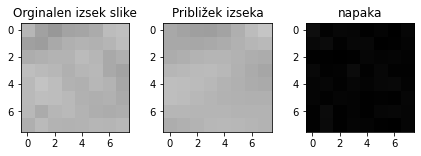

In [10]:
plt.figure(dpi=1000)
fig = plt.figure()
ax = fig.add_subplot(131)
ax.set_xticks([0,2,4,6])
ax.set_xticklabels(['0', '2', '4', '6' ])
plt.subplot(1, 3, 1)
plt.tight_layout()
plt.imshow(izsek.astype(np.uint8), cmap = "gray", vmin=0, vmax=255)
plt.title("Orginalen izsek slike")

ax = fig.add_subplot(132)
ax.set_xticks([0,2,4,6])
ax.set_xticklabels(['0', '2', '4', '6' ])
plt.subplot(1, 3, 2)
plt.tight_layout()
plt.imshow(priblizek.astype(np.uint8), cmap = "gray", vmin=0, vmax=255)
plt.title("Približek izseka")

ax = fig.add_subplot(133)
ax.set_xticks([0,2,4,6])
ax.set_xticklabels(['0', '2', '4', '6' ])
plt.subplot(1, 3, 3)
plt.tight_layout()
plt.imshow(np.absolute(napaka).astype(np.uint8), cmap = "gray", vmin=0, vmax=255)
plt.title("napaka")

plt.savefig('output\izsek_primerjava_napaka_Primera.pdf')
plt.show()
